In [1]:
import torch
# from auth_token import auth_token
from torch import autocast
from diffusers import StableDiffusionPipeline

In [2]:
device = torch.device('cpu')
# model_id = "stabilityai/stable-diffusion-2-1"
# model_id = "CompVis/stable-diffusion-v1-4"
model_id = "runwayml/stable-diffusion-v1-5"

In [4]:
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    # revision="fp16", 
#     torch_dtype=torch.float16, 
#     use_auth_token=auth_token
) #load the stable diffusion pipeline 
pipe.to(device)
pipe.safety_checker = lambda images, clip_input: (images, False) # to stop the deteecting NSFW
pipe.enable_attention_slicing()

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [5]:
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]
image.save("astronaut_rides_horse.png")

  0%|          | 0/50 [00:00<?, ?it/s]

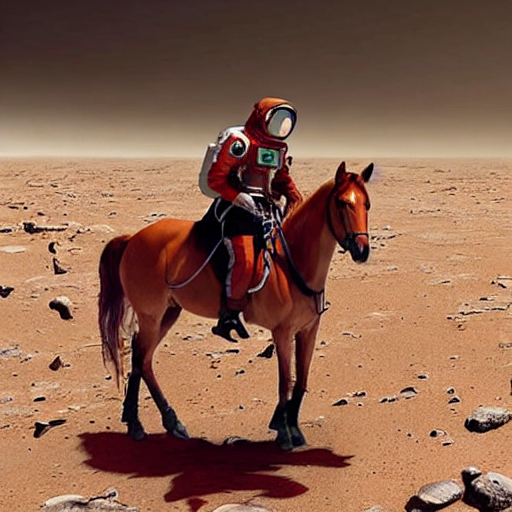

In [6]:
image

In [4]:
prompt = "a photo of an astronaut riding a horse on mars"

In [ ]:
# First-time "warmup" pass if PyTorch version is 1.13 (see explanation above)
_ = pipe(prompt, num_inference_steps=1)

In [ ]:
# Results match those from the CPU device after the warmup pass.
image = pipe(prompt).images[0]